In [1]:
import json
import os
import random

import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.model_selection
from tqdm.auto import tqdm

# Non-fair learners

In [11]:
# objectives = ['auc_y', 'auc_s', 'min', 'div']
objectives = ['auc_y']

for objective in objectives:
    objs = [
        pd.read_json(f'results/performance/{f}.json').loc[lambda x: x['objective'] == objective].assign(clf=f)
        for f in ['lr', 'rf', 'xgb', 'svc_l', 'frf']
    ]
    display(pd.concat(objs).set_index(['clf']))

,objective,auc_y,auc_s
clf,,,
lr,auc_y,0.714170,0.605318
rf,auc_y,0.800002,0.642742
xgb,auc_y,0.823091,0.668749
svc_l,auc_y,0.759668,0.615219
frf,auc_y,0.803584,0.660694


# FGB

In [4]:
pd.read_json('results/theta/fgb.json')

,theta,auc_y,auc_s,fit_time
0,0.0,0.721324,0.570052,208.594659
1,0.1,0.724486,0.558846,290.604544
2,0.2,0.720931,0.553181,230.372017
3,0.3,0.723516,0.554517,413.706557
4,0.4,0.716739,0.548836,243.166198
5,0.5,0.706738,0.538644,219.730729
6,0.6,0.686245,0.522174,223.112890
7,0.7,0.632007,0.522847,253.591358
8,0.8,0.587439,0.522217,210.878798
9,0.9,0.595807,0.522853,188.194977


<AxesSubplot:xlabel='auc_s', ylabel='auc_y'>

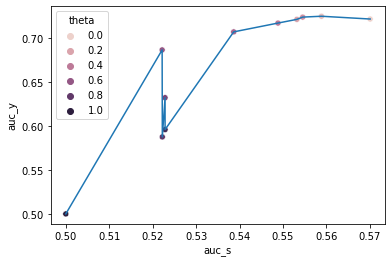

In [5]:
data = pd.read_json('results/theta/fgb.json')
sns.lineplot(data=data, x='auc_s', y='auc_y')
sns.scatterplot(data=data, x='auc_s', y='auc_y', hue='theta')

# FRF

In [6]:
pd.read_json('results/theta/frf.json').query('objective == "auc_y"')

,theta,auc_y,auc_s,objective
0,0.0,0.800901,0.668552,auc_y
1,0.1,0.800931,0.666746,auc_y
2,0.2,0.802329,0.664067,auc_y
3,0.3,0.803207,0.659489,auc_y
4,0.4,0.804707,0.652429,auc_y
5,0.5,0.811544,0.642856,auc_y
6,0.6,0.808490,0.628584,auc_y
7,0.7,0.780300,0.595678,auc_y
8,0.8,0.741135,0.563082,auc_y
9,0.9,0.657841,0.531685,auc_y


<AxesSubplot:xlabel='auc_s', ylabel='auc_y'>

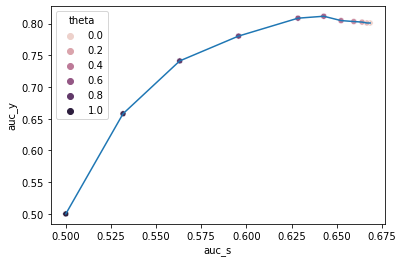

In [7]:
data = pd.read_json('results/theta/frf.json').query('objective == "auc_y"')
sns.lineplot(data=data, x='auc_s', y='auc_y')
sns.scatterplot(data=data, x='auc_s', y='auc_y', hue='theta')

<AxesSubplot:xlabel='auc_s', ylabel='auc_y'>

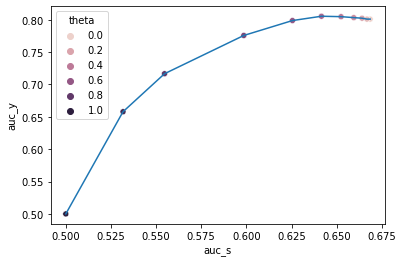

In [12]:
data = pd.read_json('results/theta/frf2.json').query('objective == "auc_y"')
sns.lineplot(data=data, x='auc_s', y='auc_y')
sns.scatterplot(data=data, x='auc_s', y='auc_y', hue='theta')

In [23]:
pd.concat(
    [
        pd.read_json('results/theta/frf2.json').query('objective == "auc_y"').assign(n_max=2),
    pd.read_json('results/theta/frf.json.bkp').query('objective == "auc_y"').assign(n_max=10)
    ],
    axis=1
)

,theta,auc_y,auc_s,objective,n_max,theta,auc_y,auc_s,objective,n_max
0,0.0,0.800901,0.668552,auc_y,2,0.0,0.800901,0.668552,auc_y,10
1,0.1,0.800931,0.666746,auc_y,2,0.1,0.800931,0.666746,auc_y,10
2,0.2,0.802329,0.664067,auc_y,2,0.2,0.802329,0.664067,auc_y,10
3,0.3,0.803207,0.659489,auc_y,2,0.3,0.803207,0.659489,auc_y,10
4,0.4,0.804707,0.652429,auc_y,2,0.4,0.804707,0.652429,auc_y,10
5,0.5,0.805346,0.641571,auc_y,2,0.5,0.811544,0.642856,auc_y,10
6,0.6,0.798683,0.625517,auc_y,2,0.6,0.808490,0.628584,auc_y,10
7,0.7,0.775654,0.598577,auc_y,2,0.7,0.780300,0.595678,auc_y,10
8,0.8,0.716549,0.554672,auc_y,2,0.8,0.741135,0.563082,auc_y,10
9,0.9,0.657841,0.531685,auc_y,2,0.9,0.657841,0.531685,auc_y,10


<AxesSubplot:xlabel='auc_s', ylabel='auc_y'>

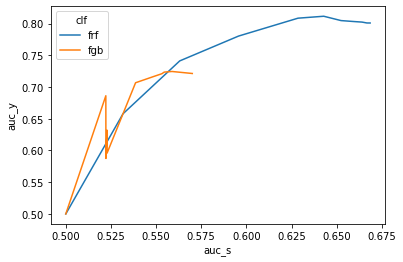

In [10]:
sns.lineplot(
    data=pd.concat([pd.read_json('results/theta/frf.json').query('objective == "auc_y"').assign(clf='frf'), pd.read_json('results/theta/fgb.json').assign(clf='fgb')]),
    x='auc_s',
    y='auc_y',
    hue='clf'
)